# **Business Context and Problem Definition**

## Business Context

In today’s competitive financial sector, acquiring new customers has become a key driver for long-term growth and sustainability. One of the most important products for banks is the term deposit, which provides a stable source of funds and strengthens customer relationships.

To promote this, banks run large-scale direct marketing campaigns by reaching out to existing and potential customers, primarily through phone calls. However, one of the major challenges is that only a small percentage of contacted customers actually subscribe, while the majority decline the offer.

For the bank, the primary business goal is not just to reduce costs, but to maximize the number of successful term deposit subscriptions. Every additional customer acquired represents long-term value through cross-selling opportunities, increased deposits, and stronger customer loyalty.

Key challenges in achieving this include:

1. Low conversion rates, as many contacted customers do not subscribe.

2. Difficulty in identifying potential subscribers, leading to wasted opportunities.

3. High competition, where other financial institutions are also targeting the same customer base.

Thus, the ability to accurately predict and identify customers who are most likely to subscribe to a term deposit is critical. By focusing on recall (capturing as many actual subscribers as possible), the bank ensures that fewer potential customers are missed, directly supporting its growth strategy and customer acquisition objectives.

### Problem Statement

The goal is to build a predictive model that identifies potential customers who are most likely to subscribe to a term deposit. The focus is on maximizing recall, ensuring that as many interested customers as possible are correctly identified, thereby increasing customer acquisition and supporting long-term bank growth.

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [2]:
data = pd.read_csv('bank_additional.csv')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
#univariate analysis
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

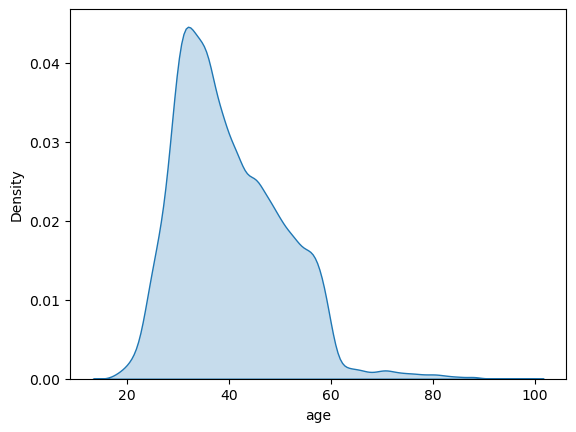

In [8]:
#age distribution
sns.kdeplot(data['age'],fill = True)
plt.show()

In [9]:
data.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


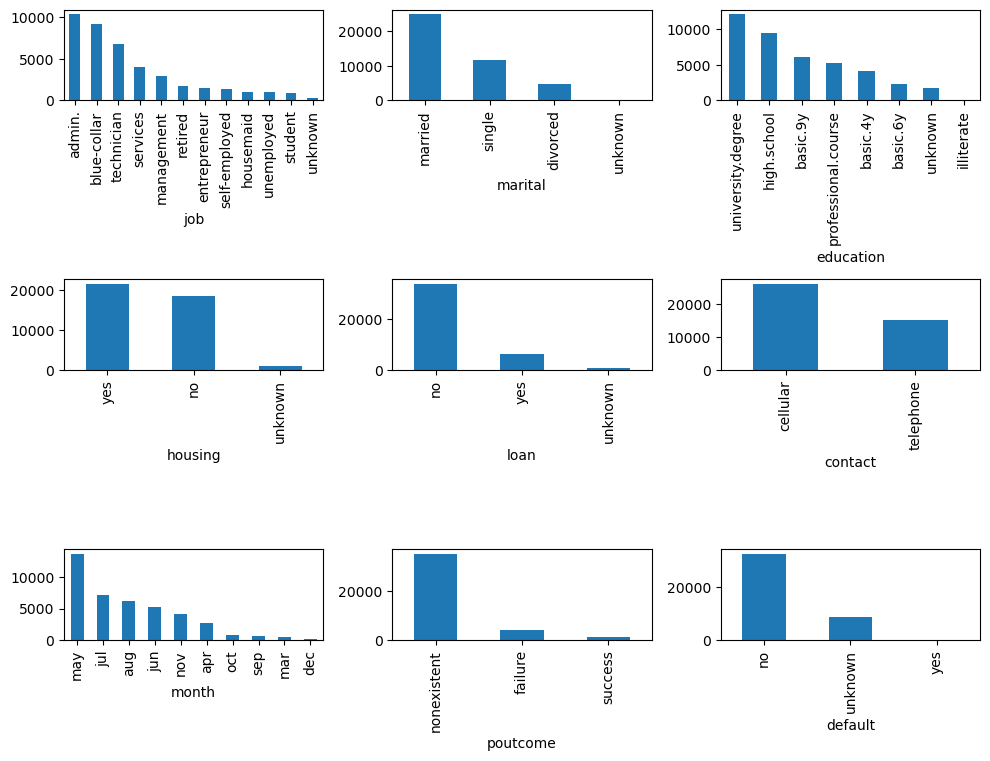

In [10]:
#categorical columns 
features = ['job','marital','education','housing','loan','contact','month','poutcome','default']
nrow = 5
ncol = 3
iterator = 1
plt.figure(figsize = (10,12))
for i in features:
    plt.subplot(nrow,ncol,iterator)
    data[i].value_counts().plot(kind = 'bar')
    iterator += 1
plt.tight_layout()
plt.show()

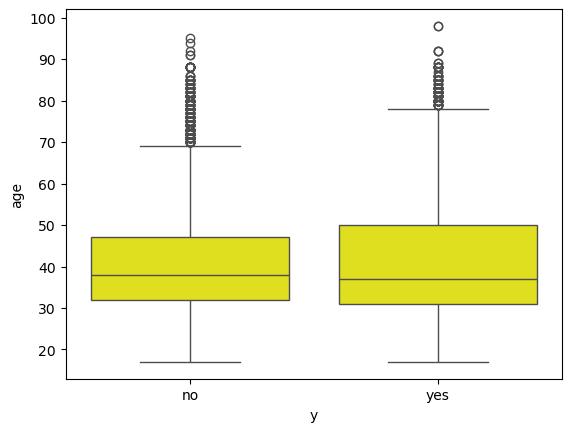

In [11]:
#bivariate analyis
#num vs cat
sns.boxplot(y = data['age'],x = data['y'],color = 'yellow')
plt.show()
#though there is no significant difference but aged people are more likly to subscribe term deposit. though we have some outliers in. further we 
#will see what to do with them 

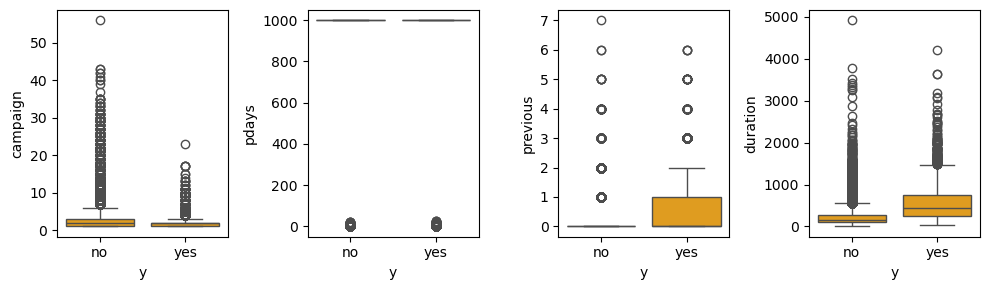

In [12]:
#campaign,pdays,previous vs y
cols = ['campaign','pdays','previous','duration']
nrow = 1
ncol = 4
iterator = 1
plt.figure(figsize = (10,3))
for i in cols:
    plt.subplot(nrow,ncol,iterator)
    sns.boxplot(y = data[i],x = data['y'],color = 'orange')
    iterator += 1
plt.tight_layout()
plt.show()
#we can see people who got contacted multiple times are less likely to say yes to term deposit. though we have some outliers in yes category
#but generally contacting a persom multiple times does not gurranty that he will subscribe to the deposit.
#we also see people who were contacted already are more likely to subscribe
#It indicates prior engagement positively influences conversion.
#high duration on call means customer are more interested and are likely to subscribe the term deposit

In [13]:
data['duration'].unique()

array([ 261,  149,  226, ..., 1246, 1556, 1868], dtype=int64)

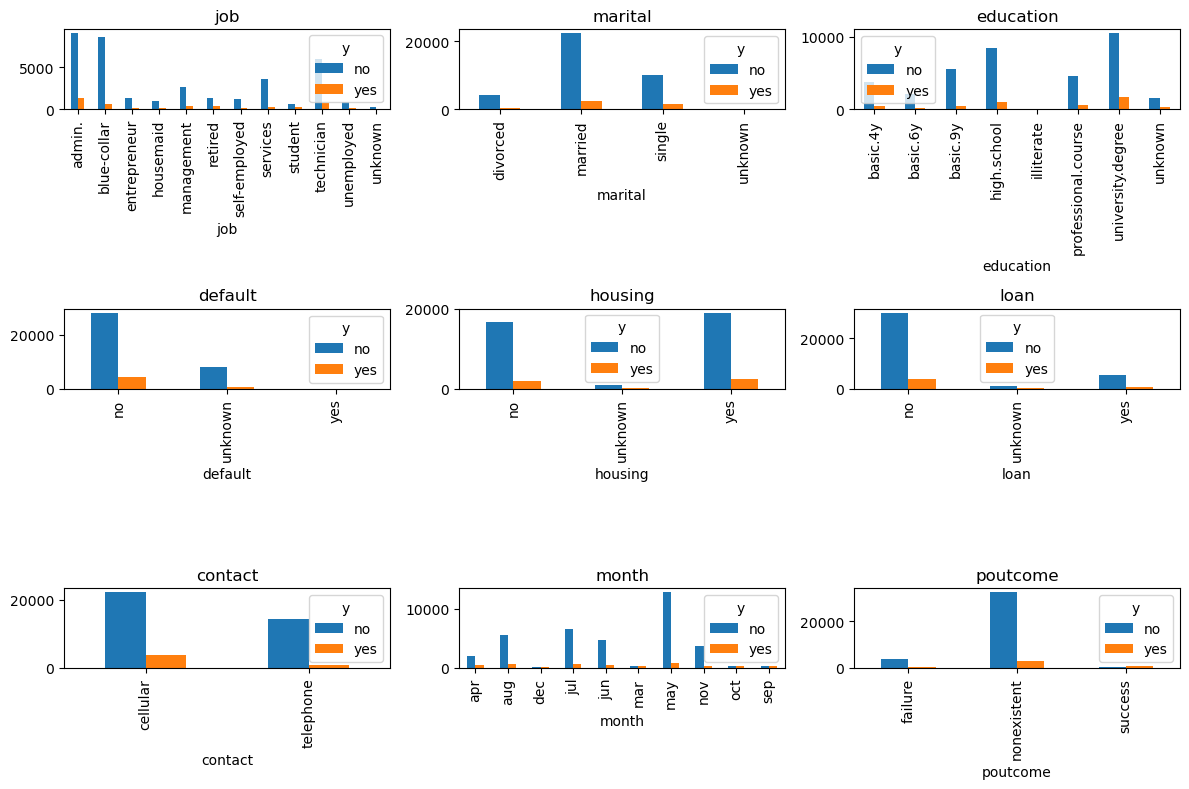

In [14]:
#cat vs cat
col = ['job','marital', 'education','default','housing','loan','contact','month','poutcome']
nrow = 3
ncol = 3
iterator = 1
plt.figure(figsize = (12,8))
for i in col:
    ax = plt.subplot(nrow,ncol,iterator)
    pd.crosstab(data[i],data['y']).plot(kind = 'bar',ax=ax)
    ax.set_title(i)
    iterator += 1
plt.tight_layout()
plt.show()
#inferences:
#admin profile job are most sucessful for bank marketing campaign
#maried people are more likely to subscribe term deposit making them valuable for bank market campaign
#people who have university degree are successful category for marketing campaign since they have high number in subscription 
#people with no loan default are more likely to say yes to bank market campaign agenda
#people with house are more likely to subscribe to term deposit
#people who had no loan are more likely to subscribe to term deposit
#people who got contacted cellular are more are more likely to subscribe to term deposit
#people who are new and never contacted in previous campaign have high number in subscribing term deposit.

In [15]:
#missing values treatment
data.isnull().sum()
#no missing values found but we have 'unknown' category in some columns

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [16]:
#lets deal with unknow values 
cat_cols = data.select_dtypes(include = 'object').columns
for i in cat_cols:
    if 'unknown' in data[i].values:
        mode = data[i].mode()[0]
        data[i] = data[i].replace('unknown',mode)

In [17]:
data['housing'].unique()

array(['no', 'yes'], dtype=object)

In [18]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [19]:
#statistical test
#job vs y
#null hypothesis = there is no relationship between job and y
#alternative hypothesis = there is association between job and y
contingency = pd.crosstab(data['job'],data['y'])
statistic,pvalue,dof,expected = stats.chi2_contingency(contingency)
print(pvalue)
if pvalue<0.05:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

6.808199923441661e-200
reject the null hypothesis


In [20]:
data.select_dtypes(include = 'object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [21]:
#creating loop for 
col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']
for i in col:
    contingency = pd.crosstab(data[i],data['y'])
    statistic,pvalue,dof,expected = stats.chi2_contingency(contingency)
    print(f"Chi-Square test for '{i}':")
    print(f"P-Value: {pvalue}")

Chi-Square test for 'job':
P-Value: 6.808199923441661e-200
Chi-Square test for 'marital':
P-Value: 5.915954286692898e-27
Chi-Square test for 'education':
P-Value: 8.692046071480118e-39
Chi-Square test for 'default':
P-Value: 1.0
Chi-Square test for 'housing':
P-Value: 0.025479312776658963
Chi-Square test for 'loan':
P-Value: 0.37633537946635287
Chi-Square test for 'contact':
P-Value: 1.5259856523129964e-189
Chi-Square test for 'month':
P-Value: 0.0
Chi-Square test for 'day_of_week':
P-Value: 2.9584820052785324e-05
Chi-Square test for 'poutcome':
P-Value: 0.0


In [22]:
#pvalue for default and loan is greater than 0.05 which means there is no associated between these column and target

In [23]:
data.drop(['default','loan'],axis = 1,inplace = True)

In [24]:
data.select_dtypes(include = 'number').columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [25]:
yes = data[data['y'] == 'yes']['age']
no  = data[data['y'] == 'no']['age']
# Test for normality (Shapiro-Wilk test)
print("Shapiro-Wilk Test for 'yes' group: ", stats.shapiro(yes))
print("Shapiro-Wilk Test for 'no' group: ", stats.shapiro(no))

# Test for equal variance (Levene's test)
print("Levene's Test for equal variance: ", stats.levene(yes, no))

# Perform t-test for independent samples
t_stat, p_value = stats.ttest_ind(yes, no)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

Shapiro-Wilk Test for 'yes' group:  ShapiroResult(statistic=0.9262908469050196, pvalue=5.708006005168368e-43)
Shapiro-Wilk Test for 'no' group:  ShapiroResult(statistic=0.9637740873636731, pvalue=3.399990463930282e-67)
Levene's Test for equal variance:  LeveneResult(statistic=689.3228404613787, pvalue=1.0963980218719163e-150)
T-Statistic: 6.172087109640128, P-Value: 6.80213641846347e-10


In [26]:
#list of columns to perform t-test:
#null hypothesis = there is no difference between mean of two independent groups
#alternative hypothesis = there is defference between mean of two independent groups
cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for i in cols:
    yes_group = data[data['y'] == 'yes'][i]
    no_group  = data[data['y'] == 'no'][i]
    t_stat,p_value = stats.ttest_ind(yes_group,no_group)
    print(f'result for column: {cols}')
    print(f'T-Statistic: {t_stat}')
    print(f'p-value: {p_value}')
    print('-' *  50)

result for column: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
T-Statistic: 6.172087109640128
p-value: 6.80213641846347e-10
--------------------------------------------------
result for column: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
T-Statistic: 89.9672253349018
p-value: 0.0
--------------------------------------------------
result for column: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
T-Statistic: -13.496542997299592
p-value: 2.0077799906175704e-41
--------------------------------------------------
result for column: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
T-Statistic: -69.72211465560429
p-value: 0.0
-----------------------------

In [27]:
#since pvalue is less than 0.05 for all the numerical colums we will reject the null hypothesis means
#there is difference between mean of two independent groups

### Feature Encoding 

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
encode = LabelEncoder()

In [31]:
#columns to be label encoded
cols = ['job','housing','contact','poutcome','marital','month','day_of_week']
for i in cols:
   data[i] = encode.fit_transform(data[i])

In [32]:
data.head()

,age,job,marital,education,housing,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,basic.4y,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,high.school,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,high.school,1,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,basic.6y,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,high.school,0,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [33]:
#we will ordinal encoding for education column since there heiarchy in this column
from sklearn.preprocessing import OrdinalEncoder

In [34]:
encoder = OrdinalEncoder(categories = [['illiterate','basic.4y','basic.6y','basic.9y','high.school','professional.course','university.degree']])

In [35]:
data['education'] = encoder.fit_transform(data[['education']])

In [36]:
#lets encode our target variable y
data['y'] = data['y'].map(lambda x: 1 if x=='yes' else 0)

In [37]:
data.head()

,age,job,marital,education,housing,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,1.0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,4.0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,4.0,1,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,2.0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,4.0,0,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [38]:
#lets split our data into x and y
x = data.drop('y',axis = 1)
y = data['y']

### Predictive Modelling

In [40]:
#lets import all the necessary library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 2)

In [42]:
print(x_train.shape)
print(x_test.shape)

(32950, 18)
(8238, 18)


### Base Model

In [44]:
model_lr = LogisticRegression(class_weight = {0:1,1:5})

In [45]:
model_lr.fit(x_train,y_train)

LogisticRegression(class_weight={0: 1, 1: 5})

In [46]:
y_predh = model_lr.predict(x_test)

In [47]:
y_preds = model_lr.predict_proba(x_test)[:,1]

In [48]:
y_preds

array([0.02710133, 0.02969285, 0.46688986, ..., 0.13946058, 0.41395649,
       0.21017415])

In [49]:
print(classification_report(y_test,y_predh))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      7318
           1       0.48      0.79      0.60       920

    accuracy                           0.88      8238
   macro avg       0.72      0.84      0.76      8238
weighted avg       0.92      0.88      0.89      8238



In [51]:
print(confusion_matrix(y_test,y_predh))

[[6522  796]
 [ 192  728]]


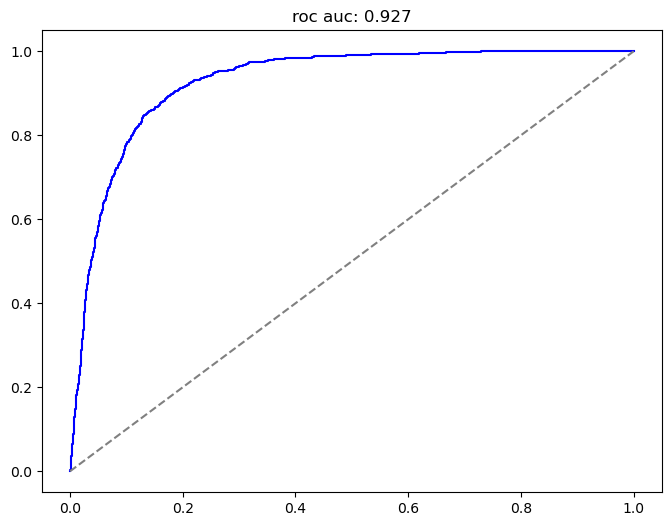

In [52]:
fpr,tpr,thresholds = roc_curve(y_test,y_preds)
plt.figure(figsize = (8,6))
plt.plot(fpr,tpr,color = 'blue')
plt.plot([0,1],[0,1],color = 'gray',linestyle = '--')
plt.title(f'roc auc: {round(roc_auc_score(y_test,y_preds),3)}')
plt.show()

### Decision Tree

In [54]:
model_dt = DecisionTreeClassifier(class_weight = {0:1,1:5})

In [55]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 5})

In [56]:
y_predh = model_dt.predict(x_test)
y_preds = model_dt.predict_proba(x_test)[:,1]

In [57]:
print(classification_report(y_test,y_predh))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7318
           1       0.50      0.47      0.49       920

    accuracy                           0.89      8238
   macro avg       0.72      0.71      0.71      8238
weighted avg       0.89      0.89      0.89      8238



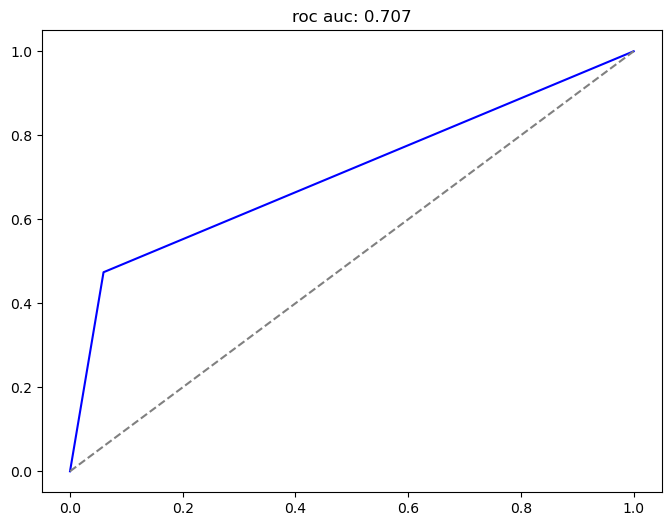

In [59]:
fpr,tpr,thresholds = roc_curve(y_test,y_preds)
plt.figure(figsize = (8,6))
plt.plot(fpr,tpr,color = 'blue')
plt.plot([0,1],[0,1],color = 'gray',linestyle = '--')
plt.title(f'roc auc: {round(roc_auc_score(y_test,y_preds),3)}')
plt.show()

### Random Forest

In [61]:
model_rf = RandomForestClassifier(class_weight = 'balanced')

In [62]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [63]:
y_predh = model_rf.predict(x_test)
y_preds = model_rf.predict_proba(x_test)[:,1]

In [64]:
print(classification_report(y_test,y_predh))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7318
           1       0.63      0.43      0.51       920

    accuracy                           0.91      8238
   macro avg       0.78      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



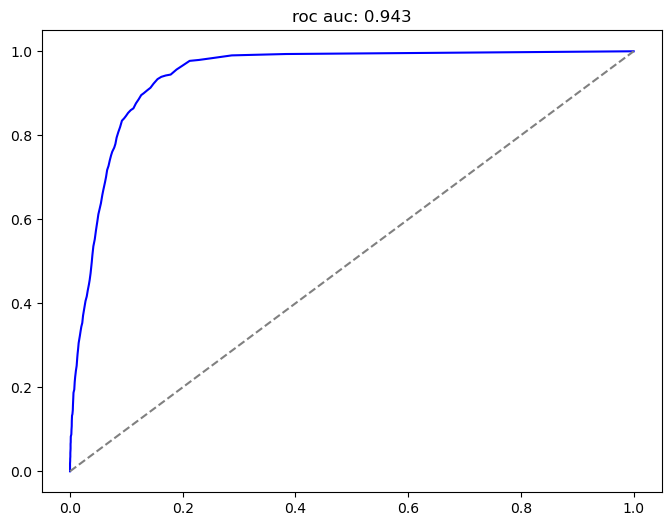

In [66]:
fpr,tpr,thresholds = roc_curve(y_test,y_preds)
plt.figure(figsize = (8,6))
plt.plot(fpr,tpr,color = 'blue')
plt.plot([0,1],[0,1],color = 'gray',linestyle = '--')
plt.title(f'roc auc: {round(roc_auc_score(y_test,y_preds),3)}')
plt.show()

### Gradient Boosting

In [68]:
model_gb = GradientBoostingClassifier()

In [69]:
model_gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [70]:
y_predh = model_gb.predict(x_test)
y_preds = model_gb.predict_proba(x_test)[:,1]

In [71]:
print(classification_report(y_test,y_predh))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7318
           1       0.67      0.52      0.58       920

    accuracy                           0.92      8238
   macro avg       0.81      0.74      0.77      8238
weighted avg       0.91      0.92      0.91      8238



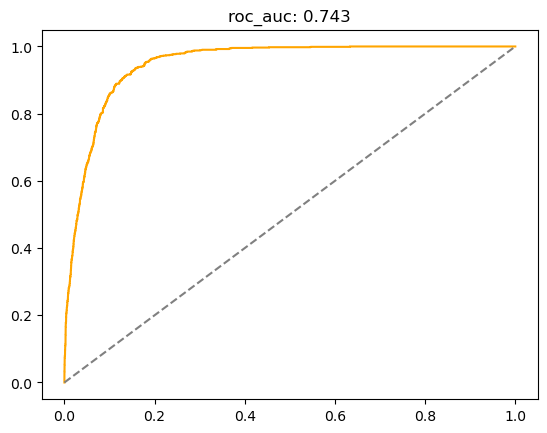

In [73]:
fpr,tpr,thres = roc_curve(y_test,y_preds)
plt.plot(fpr,tpr,color = 'orange')
plt.plot([0,1],[0,1],color = 'grey',linestyle = '--')
plt.title(f'roc_auc: {round(roc_auc_score(y_test,y_predh),3)}')
plt.show()

### XGB 

In [75]:
model_xgb = XGBClassifier()

In [76]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [77]:
y_predh = model_xgb.predict(x_test)
y_preds = model_xgb.predict_proba(x_test)[:,1]

In [78]:
print(classification_report(y_test,y_predh))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7318
           1       0.63      0.53      0.57       920

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



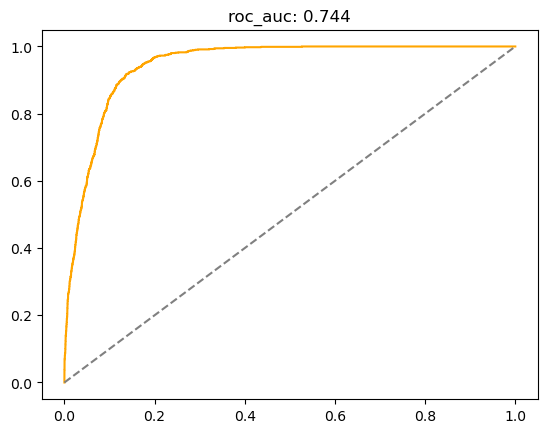

In [80]:
fpr,tpr,thres = roc_curve(y_test,y_preds)
plt.plot(fpr,tpr,color = 'orange')
plt.plot([0,1],[0,1],color = 'grey',linestyle = '--')
plt.title(f'roc_auc: {round(roc_auc_score(y_test,y_predh),3)}')
plt.show()

In [161]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Suppose you have trained multiple models
models = {
    "Logistic Regression": model_lr,
    "Decision Tree": model_dt,
    
    "Random Forest": model_rf,
    "XGBoost": model_xgb
}

# Create an empty list to store results
results = []

for name, model in models.items():
    # Get predictions and probabilities
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:,1]  # For ROC-AUC
    
    # Collect metrics
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

# Convert results into DataFrame
metrics_df = pd.DataFrame(results)

print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.880068   0.477690  0.791304  0.595745  0.926812
1        Decision Tree  0.888444   0.500574  0.473913  0.486879  0.707235
2        Random Forest  0.908473   0.632588  0.430435  0.512290  0.943353
3              XGBoost  0.912964   0.632680  0.526087  0.574481  0.945687


In [163]:
threshold = 0.3  
for name, model in models.items():
    y_preds = model.predict_proba(x_test)[:, 1]
    y_pred = (y_preds >= threshold).astype(int)
    rec = recall_score(y_test, y_pred)
    print(f"{name}: Recall = {rec:.3f}")

Logistic Regression: Recall = 0.913
Decision Tree: Recall = 0.474
Random Forest: Recall = 0.761
XGBoost: Recall = 0.730


### Conclusion